In [10]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [11]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze

maze = gym.make('Maze5-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()


This is how maze looks like
<class 'tuple'>
('0', '1', '0', '1', '0', '1', '1', '1')

■ ■ ■ ■ ■ ■ ■ ■ ■
■ □ □ □ □ □ □ $ ■
■ □ □ ■ □ ■ ■ □ ■
■ □ ■ □ □ □ □ □ ■
■ A □ □ ■ ■ □ □ ■
■ □ ■ □ ■ □ □ ■ ■
■ □ ■ □ □ ■ □ □ ■
■ □ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■ ■


In [12]:
from lcs.agents.xcs import XCS, Configuration
from utils.xcs_utils import *

cfg = Configuration(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.01,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=1,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xcs_metrics)


In [13]:

df = avg_experiment(maze=maze,
                         cfg=cfg,
                         number_of_tests=1,
                         explore_trials=1000,
                         exploit_trials=500)


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 0.06490789999998015, 'population': 118, 'numerosity': 167, 'average_specificity': 7.251497005988024, 'fraction_accuracy': 1.0}


Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 30, 'reward': 1000.0345501267201, 'perf_time': 0.10261690000015733, 'population': 389, 'numerosity': 1600, 'average_specificity': 6.7275, 'fraction_accuracy': 2.6545478371694405e-16}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 9, 'reward': 1000.0000000000001, 'perf_time': 0.04221030000007886, 'population': 427, 'numerosity': 1600, 'average_specificity': 6.305, 'fraction_accuracy': 7.133214498104759e-15}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 19, 'reward': 1001.4924803628722, 'perf_time': 0.07440409999981057, 'population': 417, 'numerosity': 1602, 'average_specificity': 6.504369538077404, 'fraction_accuracy': 2.1510520454084546e-15}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 58, 'reward': 1000.0000024149464, 'perf_time': 0.22334860000000845, 'population': 418, 'numerosity': 1600, 'average_specificity': 6.29125, 'fraction_accuracy': 2.073694525858471e-15}
INFO:lcs.agents.Agent:{'trial': 500, 'st

In [14]:
display(df)

,steps_in_trial,reward,perf_time,population,numerosity,average_specificity,fraction_accuracy
trial,,,,,,,
0,100,0.000000e+00,0.064908,118,167,7.251497,1.000000e+00
100,30,1.000035e+03,0.102617,389,1600,6.727500,2.654548e-16
200,9,1.000000e+03,0.042210,427,1600,6.305000,7.133214e-15
300,19,1.001492e+03,0.074404,417,1602,6.504370,2.151052e-15
400,58,1.000000e+03,0.223349,418,1600,6.291250,2.073695e-15
500,100,1.675610e-12,0.400972,414,1600,6.568750,6.395394e-13
600,2,1.504100e+03,0.007697,408,1610,7.822360,3.010446e-13
700,23,1.000000e+03,0.081543,438,1600,6.031250,3.797291e-15
800,17,1.002961e+03,0.066267,385,1618,6.177379,2.212758e-13


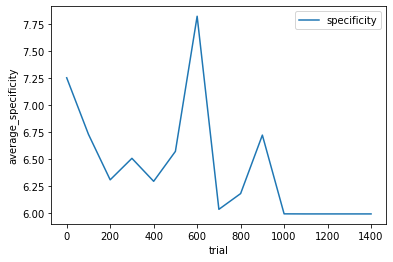

In [15]:
import pandas as pd
import numpy as np

ax = df['average_specificity'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["specificity"])


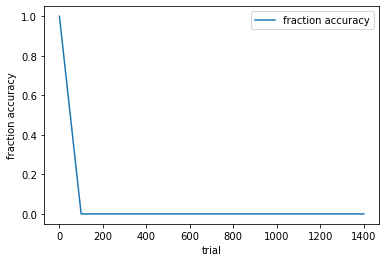

In [16]:
ax = df['fraction_accuracy'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["fraction accuracy"])

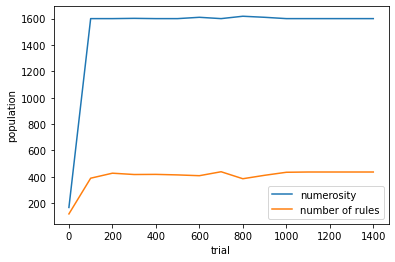

In [17]:
ax = df[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

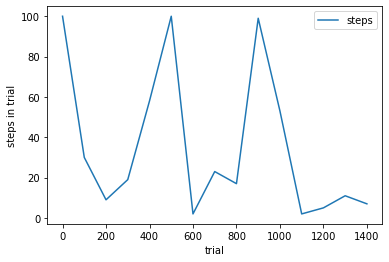

In [18]:
ax = df['steps_in_trial'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["steps"])